# **Import Library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px
import glob
from scipy import stats

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [3]:
df = pd.read_csv('train_prototipe.csv')

# Replace the values in the 'Late' column
df['Late'] = df['Late'].replace({-1: 0, 0: 1})

df.sample(10)


,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late,Weight_category_encoded,Reorder_purchases
8114,0.0,0.426829,0.0,0,0.333333,0.408036,1.0,1.333333,0.0
7392,0.5,-0.487805,0.0,1,-0.166667,0.285002,1.0,1.333333,0.0
8047,1.0,1.060976,2.0,0,0.166667,-0.842859,0.0,-0.666667,0.0
4120,0.0,-0.073171,-1.0,1,-1.000000,0.522349,0.0,1.333333,-1.0
2577,-0.5,-0.475610,-1.0,0,5.833333,-0.772777,1.0,-0.666667,-1.0
2035,0.5,-0.878049,-1.0,0,8.000000,-0.744744,1.0,-0.666667,-1.0
1988,0.0,0.463415,3.0,1,6.166667,-0.458807,1.0,0.000000,0.0
6390,0.0,0.060976,-1.0,2,-0.500000,-0.024918,1.0,0.000000,-1.0
3474,-1.0,-0.646341,2.0,1,-0.666667,-0.003426,0.0,0.000000,0.0
10243,-0.5,-0.207317,0.0,0,-0.500000,0.220838,1.0,0.666667,0.0


# **Stage 3**

## **Modelling**

### **Function**

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model):
    y_pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [5]:
def plot_feature_importances(model):
    import pandas as pd
    import matplotlib.pyplot as plt

    # feature importances
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    })

    
    feature_importances = feature_importances.reset_index(drop=True)

    # Group by
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]

    # Plot
    plt.figure(figsize=(6, 5))
    fi.plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top Feature Importances - {model}')
    plt.show()

# Contoh pemanggilan
# plot_feature_importances(best_model_xgb)


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

#contoh pemanggilan
#eval_regression(regressor)

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    # Evaluation Metrics
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

   
    # Cross-validation
    score = cross_validate(model, x_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('\nRecall (Cross-validation Train): %.2f' % score['train_score'].mean())
    print('Recall (Cross-validation Test): %.2f' % score['test_score'].mean())
    
    # Confusion Matrix
    print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))

def show_best_hyperparameter(model):
    if hasattr(model, 'best_estimator_'):
        print(model.best_estimator_.get_params())
    else:
        print("The model is not a GridSearchCV or RandomizedSearchCV instance.")

# Example usage
# Assuming x_train, x_test, y_train, y_test are already defined
#model = RandomForestClassifier(random_state=42)
#model.fit(x_train, y_train.values.ravel())

#eval_classification(model)
#show_feature_importance(model)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    
    y_pred = model.predict(x_test)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def draw_learning_curve(model_type, param_values):
    if model_type == 'LogisticRegression':
        model = LogisticRegression()
    elif model_type == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_type == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_type == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_type == 'SVC':
        model = SVC(probability=True)
    else:
        raise ValueError("Invalid model type. Supported types are 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', and 'SVC'.")

    train_scores = []
    test_scores = []

    for param_value in param_values:
        if model_type == 'LogisticRegression':
            model.set_params(C=param_value)
        elif model_type == 'KNeighborsClassifier':
            model.set_params(n_neighbors=param_value)
        elif model_type == 'DecisionTreeClassifier':
            model.set_params(max_depth=param_value)
        elif model_type == 'RandomForestClassifier':
            model.set_params(n_estimators=param_value)
        elif model_type == 'SVC':
            model.set_params(C=param_value)

        model.fit(x_train, y_train)

        # eval train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(param_value) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter Value')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Tuning - ' + model_type)
    plt.legend()
    plt.show()

#contoh pemanggilan
#param_values_rf = [50, 100, 150, 200]
#draw_learning_curve('RandomForestClassifier', param_values_rf)

#param_values_svc = [0.1, 1, 10]
#draw_learning_curve('SVC', param_values_svc)


In [95]:
def optimal_threshold(model):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Filter thresholds kriteria TPR > 0.5 dan FPR > 0.05 serta < 0.15
    candidate_thresholds = thresholds[(tpr > 0.5) & (fpr > 0.05) & (fpr < 0.15)]

    optimal_threshold = candidate_thresholds[np.argmax(tpr[fpr > 0.05] - fpr[fpr > 0.05])]

    # Prediksi label menggunakan threshold yang dioptimalkan
    y_pred_optimal = (y_pred >= optimal_threshold).astype(int)

    # Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred_optimal)
    recall = recall_score(y_test, y_pred_optimal)
    f1 = f1_score(y_test, y_pred_optimal)

    # True Positive Rate (TPR) & False Positive Rate (FPR)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f'\nOptimal threshold {model}: {optimal_threshold:.2f}')
    print(f'\nPrecision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'TPR: {tpr:.2f}')
    print(f'FPR: {fpr:.2f}')

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

def set_roc_threshold(model, threshold):

    # Probability of model 
    y_probs = model.predict_proba(x_test)[:, 1]
    
    # Set threshold
    y_pred_new_threshold = (y_probs >= threshold).astype(int)

    # Model Eval
    conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [94]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, roc_curve, confusion_matrix

def table_threshold(model):

    y_probs = model.predict_proba(x_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)


    # Range nilai threshold
    desired_thresholds = np.arange(0.0, 1.1, 0.1)

    results = []

    # precision, recall, dan f-score 
    for threshold in desired_thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        results.append({
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F-Score': fscore,
            'TPR': tpr,
            'FPR': fpr
        })

    df_results = pd.DataFrame(results)
    return df_results

### **Split Dataset**

In [13]:
x = df.drop(columns=['Late'])
y = df[['Late']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

train_ratio = len(x_train) / len(x)
test_ratio = len(x_test) / len(x)

print(f"Training set ratio: {train_ratio:.2f}")
print(f"Test set ratio: {test_ratio:.2f}")


x_train shape: (7699, 8)
x_test shape: (3300, 8)
y_train shape: (7699, 1)
y_test shape: (3300, 1)
Training set ratio: 0.70
Test set ratio: 0.30


### **Logistic Regression**

Accuracy (Test Set): 0.64
Precision (Test Set): 0.71
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.72

Recall (Cross-validation Train): 0.68
Recall (Cross-validation Test): 0.67

Confusion Matrix (Test Set):
 [[ 754  558]
 [ 627 1361]]


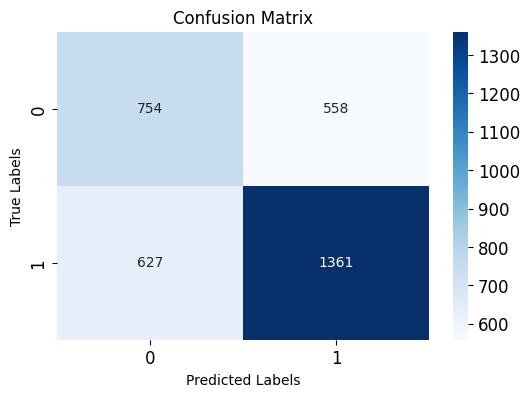

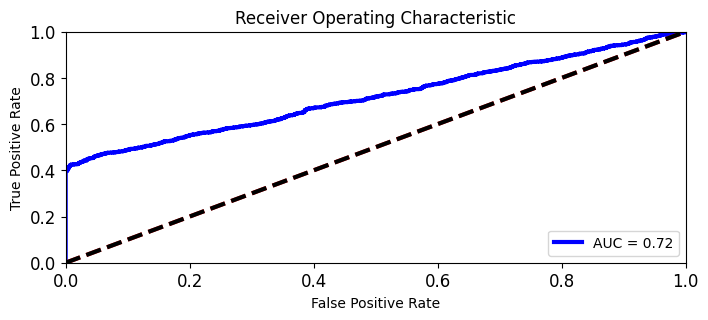

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

eval_classification(logreg)
plot_confusion_matrix(logreg)
plot_roc(logreg)

param value: 0.001; train: 0.719931851416497; test: 0.7154474100701771
param value: 0.01; train: 0.7223569334536779; test: 0.71765079808117
param value: 0.1; train: 0.722616583754889; test: 0.7179164928595967
param value: 1; train: 0.7225874072052784; test: 0.7178681847180646
param value: 10; train: 0.7225697053658263; test: 0.7178582163713991
param value: 100; train: 0.722574183301498; test: 0.7178509318103745


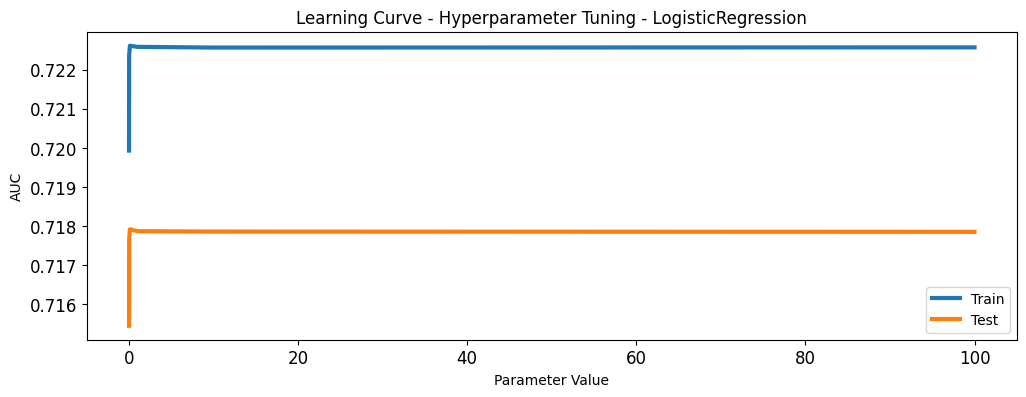

In [24]:
param_values_logreg = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve('LogisticRegression', param_values_logreg)

- Tidak perlu hyperparameter tuning, karena nilai AUC cenderung stabil pada param value logistic regression

#### Set Threshold

In [60]:
optimal_threshold(logreg)

Optimal threshold: 0.61

Precision: 0.86
Recall: 0.50
F1-score: 0.63
TPR: 0.50
FPR: 0.12


In [20]:
table_threshold(logreg)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.602424,1.000000,0.751891,1.000000,1.000000
1,0.1,0.602424,1.000000,0.751891,1.000000,1.000000
2,0.2,0.602366,0.998994,0.751561,0.998994,0.999238
3,0.3,0.609131,0.979879,0.751253,0.979879,0.952744
4,0.4,0.638536,0.860161,0.732962,0.860161,0.737805
5,0.5,0.709224,0.684608,0.696698,0.684608,0.425305
6,0.6,0.844813,0.512072,0.637645,0.512072,0.142530
7,0.7,0.987119,0.424044,0.593244,0.424044,0.008384
8,0.8,1.000000,0.380785,0.551548,0.380785,0.000000
9,0.9,1.000000,0.324447,0.489935,0.324447,0.000000


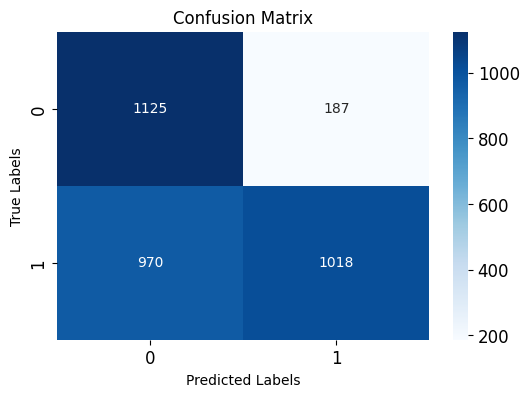

In [25]:
set_roc_threshold(logreg, 0.6)

- Kita dapat melihat bahwa pada setting threshold `0.6` TPR/Recall memiliki nilai `0.51` dan FPR  memiliki nilai `0.14`, sehingga dapat disimpulkan bahwa threshold `0.6` memberikan keseimbangan yang baik antara mendeteksi sebagian besar kasus fraud yang sebenarnya (Recall yang tinggi) dan mengurangi jumlah false alarms (FPR yang rendah), dengan tingkat precision `0.84`.
- Optimal Threshold telah ditentukan pada function dengan kategori `TPR` > 0.5, dan 0.05 < `FPR` < 0.15 
- Hal ini bertujuan tidak hanya untuk menyeimbangkan deteksi fraud namun juga tingkat biaya untuk ivestigasi false alarm (FPR)

### **Decision Tree**

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.71
F1-Score (Test Set): 0.71
ROC AUC (Test Set): 0.63
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.69

Confusion Matrix (Test Set):
 [[ 729  583]
 [ 580 1408]]


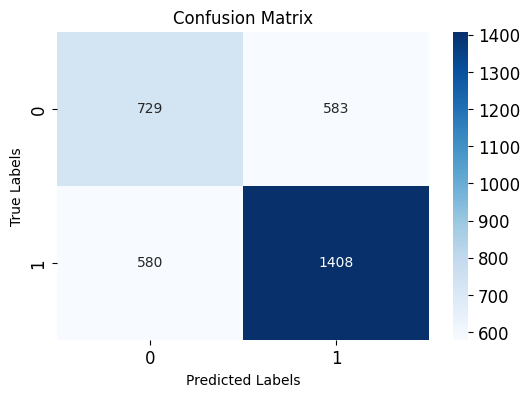

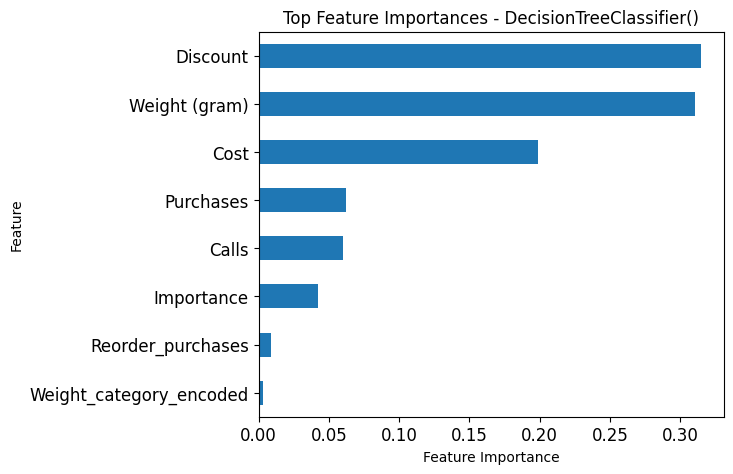

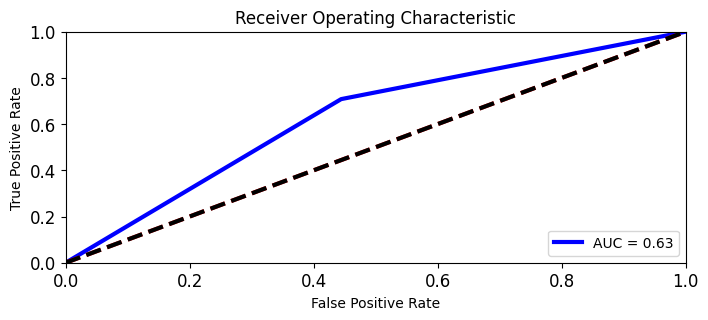

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)
plot_confusion_matrix(dt)
plot_feature_importances(dt)
plot_roc(dt)

param value: 1; train: 0.7014207650273224; test: 0.7022132796780685
param value: 2; train: 0.7346914072612526; test: 0.7425467438779014
param value: 3; train: 0.7477541403413026; test: 0.7515393427639004
param value: 5; train: 0.7602693408338755; test: 0.7516043287161995
param value: 6; train: 0.7705025083436537; test: 0.7521777003484319
param value: 7; train: 0.7841141383822058; test: 0.7447144758796682


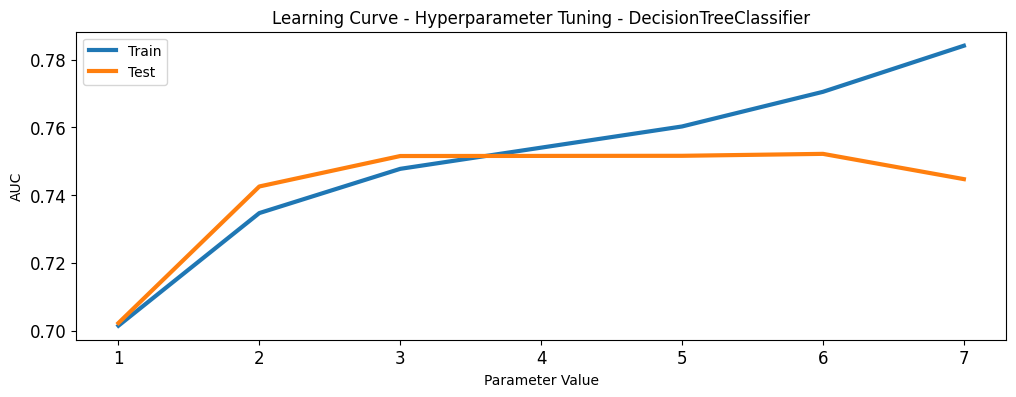

In [ ]:
param_values_dt = [1, 2, 3, 5, 6, 7]
draw_learning_curve('DecisionTreeClassifier', param_values_dt)

#### **Hypertuning**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Inisialisasi DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

# Evaluasi model
y_pred_proba = best_dt.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)


AUC : 0.7521777003484319


Accuracy (Test Set): 0.68
Precision (Test Set): 0.90
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.77

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.51

Confusion Matrix (Test Set):
 [[1201  111]
 [ 948 1040]]


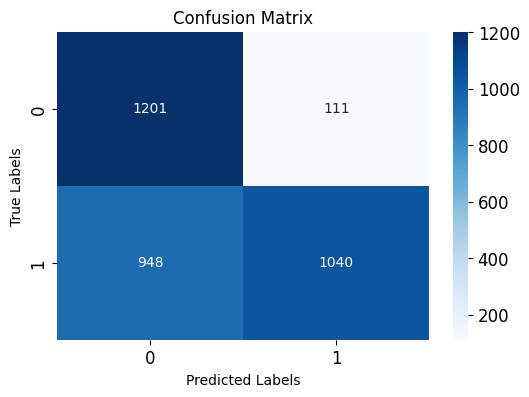

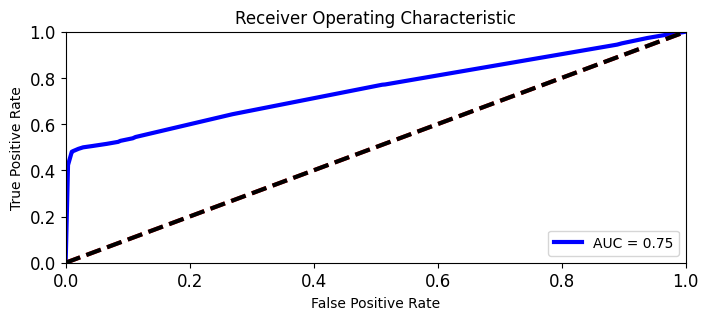

In [31]:
eval_classification(best_dt)
plot_confusion_matrix(best_dt)
plot_roc(best_dt)

#### Set Threshold

In [61]:
optimal_threshold(best_dt)

Optimal threshold: 0.60

Precision: 0.92
Recall: 0.51
F1-score: 0.66
TPR: 0.51
FPR: 0.07


In [62]:
table_threshold(best_dt)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.602424,1.000000,0.751891,1.000000,1.000000
1,0.1,0.603412,0.996479,0.751660,0.996479,0.992378
2,0.2,0.604402,0.994467,0.751854,0.994467,0.986280
3,0.3,0.607898,0.983400,0.751345,0.983400,0.961128
4,0.4,0.616623,0.944165,0.746025,0.944165,0.889482
5,0.5,0.903562,0.523139,0.662631,0.523139,0.084604
6,0.6,0.947170,0.505030,0.658793,0.505030,0.042683
7,0.7,0.964078,0.499497,0.658052,0.499497,0.028201
8,0.8,0.983623,0.483400,0.648229,0.483400,0.012195
9,0.9,0.986570,0.480382,0.646143,0.480382,0.009909


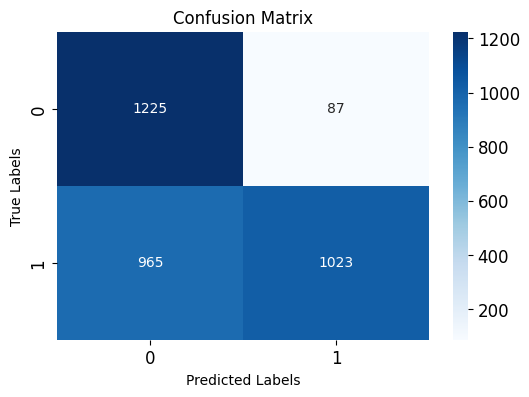

In [63]:
set_roc_threshold(best_dt, 0.6)

### **Random Forest**

Accuracy (Test Set): 0.67
Precision (Test Set): 0.75
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.65

Confusion Matrix (Test Set):
 [[ 869  443]
 [ 653 1335]]


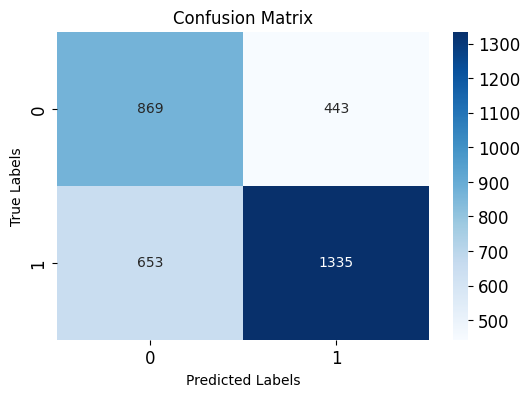

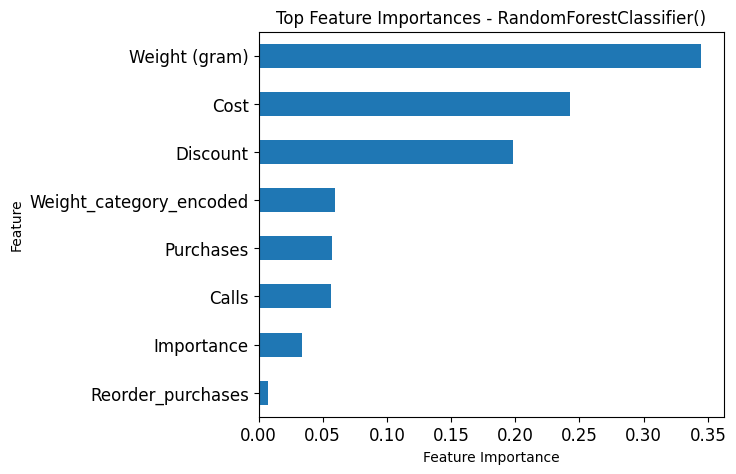

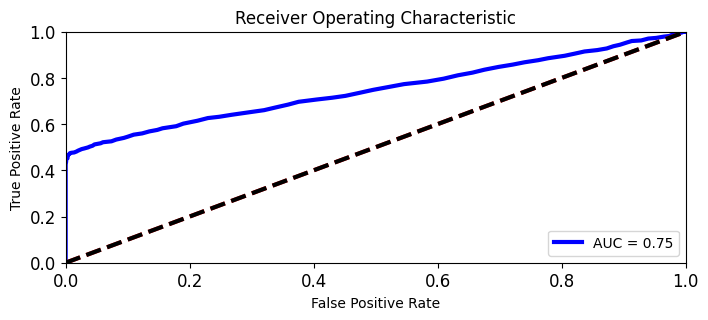

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
eval_classification(rf)
plot_confusion_matrix(rf)
plot_feature_importances(rf)
plot_roc(rf)

param value: 10; train: 0.9989853977316457; test: 0.7494157015262304
param value: 50; train: 1.0; test: 0.742974232590666
param value: 100; train: 1.0; test: 0.7440184169038622
param value: 200; train: 1.0; test: 0.7464754226578987
param value: 300; train: 1.0; test: 0.7447006735535162
param value: 400; train: 1.0; test: 0.7438821189331108
param value: 500; train: 1.0; test: 0.7449519909088678


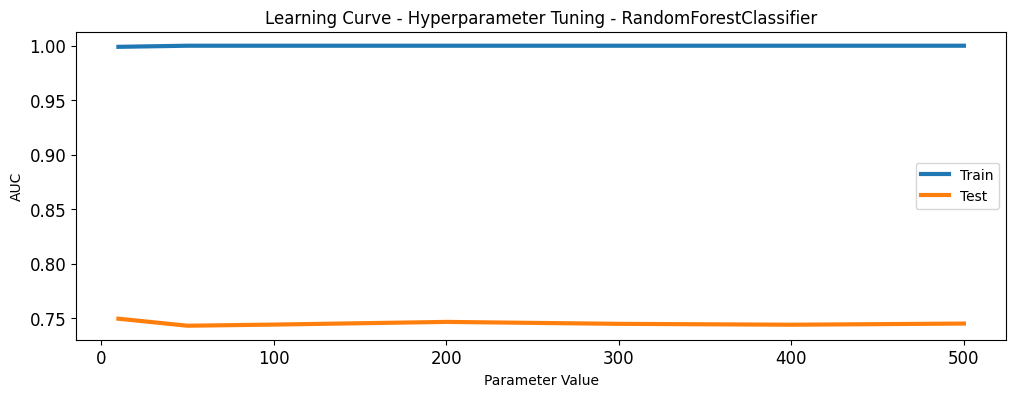

In [65]:
param_values_rf = [10, 50, 100, 200, 300, 400, 500]
draw_learning_curve('RandomForestClassifier', param_values_rf)


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()


# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Membuat label rata
y_train_ravel = y_train.values.ravel()

# Grid search dengan cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train_ravel)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [67]:
# Evaluasi model
y_pred_proba = best_rf.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)

AUC : 0.7426280242430191


Accuracy (Test Set): 0.68
Precision (Test Set): 0.86
Recall (Test Set): 0.56
F1-Score (Test Set): 0.68
ROC AUC (Test Set): 0.74
ROC AUC (Train Set): 0.90

Recall (Cross-validation Train): 0.67
Recall (Cross-validation Test): 0.56

Confusion Matrix (Test Set):
 [[1132  180]
 [ 873 1115]]


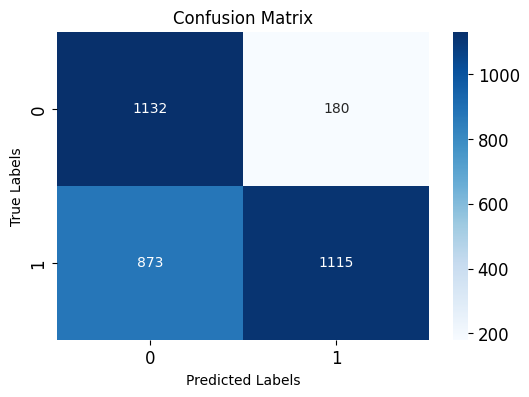

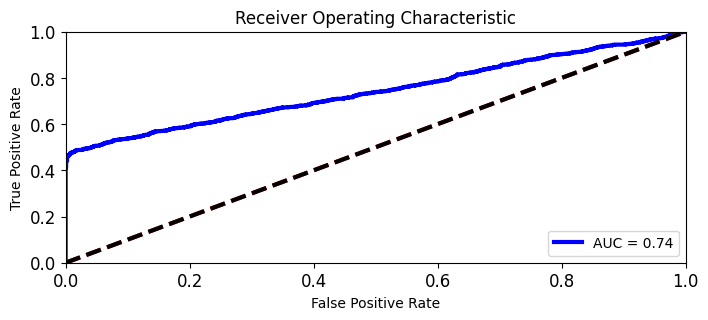

In [68]:
eval_classification(best_rf)
plot_confusion_matrix(best_rf)
plot_roc(best_rf)

#### Set Threshold

In [86]:
optimal_threshold(best_rf)

Optimal threshold: 0.56

Precision: 0.94
Recall: 0.51
F1-score: 0.66
TPR: 0.51
FPR: 0.05


In [85]:
table_threshold(best_rf)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.602424,1.000000,0.751891,1.000000,1.000000
1,0.1,0.602424,1.000000,0.751891,1.000000,1.000000
2,0.2,0.602424,1.000000,0.751891,1.000000,1.000000
3,0.3,0.602435,0.995473,0.750616,0.995473,0.995427
4,0.4,0.642750,0.865191,0.737564,0.865191,0.728659
5,0.5,0.852496,0.566901,0.680967,0.566901,0.148628
6,0.6,0.949185,0.497988,0.653250,0.497988,0.040396
7,0.7,0.984678,0.484909,0.649815,0.484909,0.011433
8,0.8,0.994670,0.469316,0.637731,0.469316,0.003811
9,0.9,0.997763,0.448692,0.619015,0.448692,0.001524


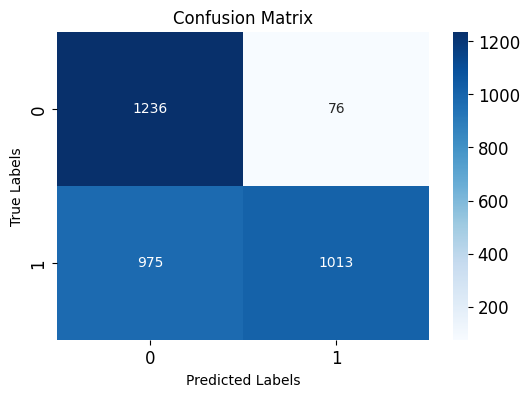

In [84]:
set_roc_threshold(best_rf, 0.56)

### **SVC**

Accuracy (Test Set): 0.67
Precision (Test Set): 0.92
Recall (Test Set): 0.50
F1-Score (Test Set): 0.65
ROC AUC (Test Set): 0.73
ROC AUC (Train Set): 0.75

Recall (Cross-validation Train): 0.51
Recall (Cross-validation Test): 0.50

Confusion Matrix (Test Set):
 [[1224   88]
 [ 997  991]]


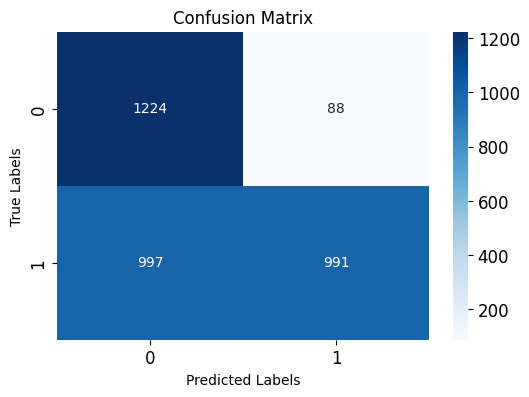

In [76]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)
eval_classification(svc)
plot_confusion_matrix(svc)


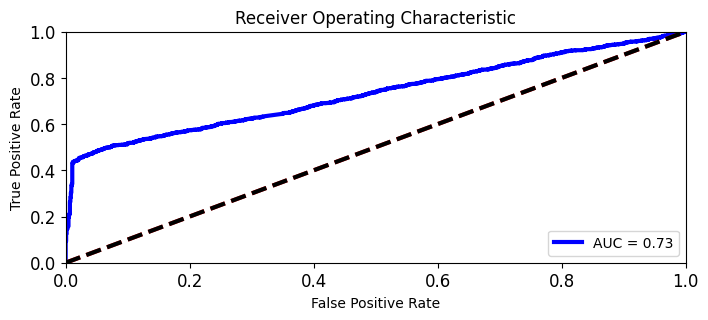

In [77]:
plot_roc(svc)

param value: 0.001; train: 0.7373067315967339; test: 0.7309550902978849
param value: 0.01; train: 0.7380846329841942; test: 0.7321215785567061
param value: 0.1; train: 0.7440591087508658; test: 0.7298871353118712
param value: 1; train: 0.7523678484218774; test: 0.7327089442140649
param value: 10; train: 0.7662275141159925; test: 0.7400983645777102
param value: 100; train: 0.7797600806028422; test: 0.7418347738872259


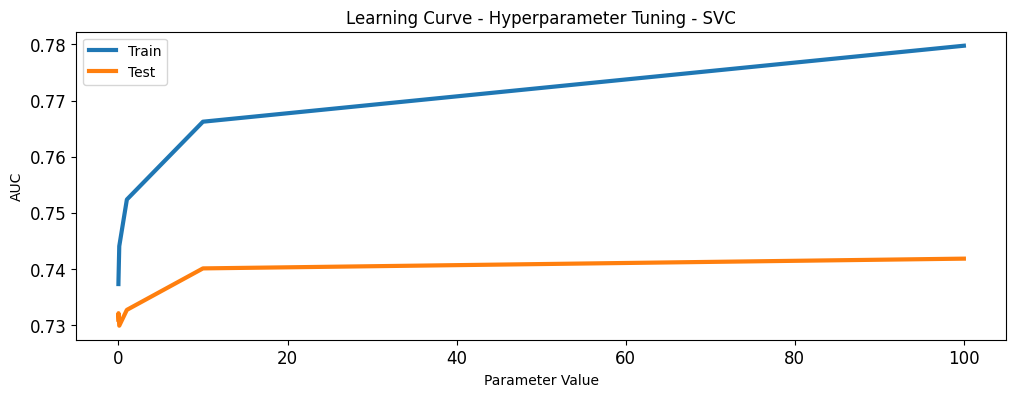

In [78]:
param_values_svc = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve('SVC', param_values_svc)


#### Hypertuning

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Mengonversi y_train ke bentuk yang diharapkan
y_train_ravel = y_train.values.ravel()

svc = SVC(probability=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train_ravel)

print("Best Parameter:", grid_search.best_params_)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(x_test)


Best Parameter: {'C': 10}


Accuracy (Test Set): 0.68
Precision (Test Set): 0.91
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.74
ROC AUC (Train Set): 0.77

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.52

Confusion Matrix (Test Set):
 [[1206  106]
 [ 960 1028]]


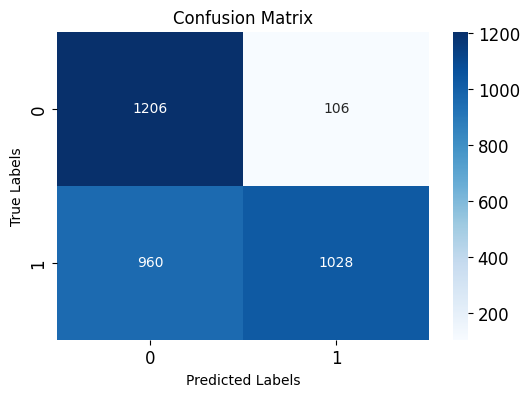

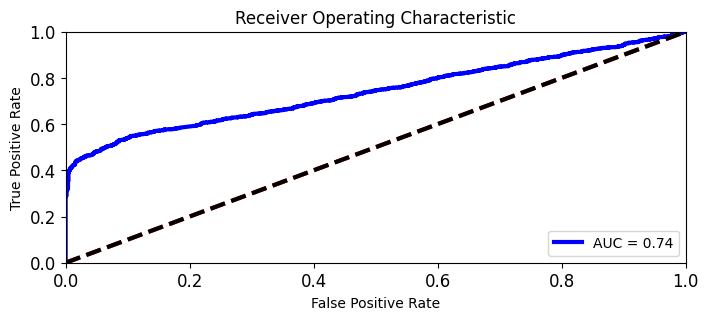

In [80]:
#evaluasi model
eval_classification(best_svc)
plot_confusion_matrix(best_svc)
plot_roc(best_svc)

#### Set Threshold

In [87]:
optimal_threshold(best_svc)

Optimal threshold: 0.55

Precision: 0.88
Recall: 0.55
F1-score: 0.68
TPR: 0.55
FPR: 0.11


In [88]:
table_threshold(best_svc)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.602424,1.000000,0.751891,1.000000,1.000000
1,0.1,0.602424,1.000000,0.751891,1.000000,1.000000
2,0.2,0.602424,1.000000,0.751891,1.000000,1.000000
3,0.3,0.602304,0.999497,0.751655,0.999497,1.000000
4,0.4,0.671687,0.785211,0.724026,0.785211,0.581555
5,0.5,0.816412,0.590543,0.685347,0.590543,0.201220
6,0.6,0.904969,0.522133,0.662201,0.522133,0.083079
7,0.7,0.922647,0.497988,0.646847,0.497988,0.063262
8,0.8,0.963558,0.452213,0.615543,0.452213,0.025915
9,0.9,0.991139,0.393863,0.563715,0.393863,0.005335


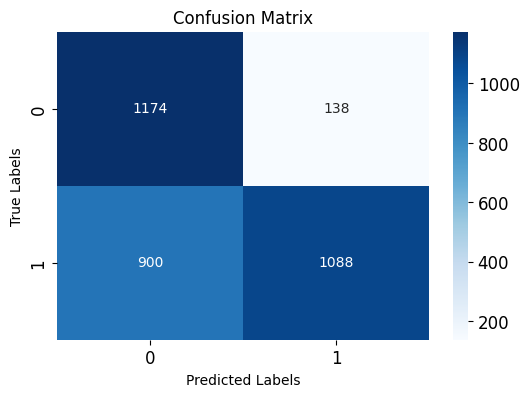

In [89]:
set_roc_threshold(best_svc, 0.55)

## Optimal Model

In [97]:
optimal_threshold(logreg)
optimal_threshold(best_dt)
optimal_threshold(best_rf)
optimal_threshold(best_svc)


Optimal threshold LogisticRegression(): 0.61

Precision: 0.86
Recall: 0.50
F1-score: 0.63
TPR: 0.50
FPR: 0.12

Optimal threshold DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5): 0.60

Precision: 0.92
Recall: 0.51
F1-score: 0.66
TPR: 0.51
FPR: 0.07

Optimal threshold RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50): 0.56

Precision: 0.94
Recall: 0.51
F1-score: 0.66
TPR: 0.51
FPR: 0.05

Optimal threshold SVC(C=10, probability=True): 0.55

Precision: 0.88
Recall: 0.55
F1-score: 0.68
TPR: 0.55
FPR: 0.11


- Random Forest menjadi model terbaik dengan nilai optimal threshold 0.56. Model ini memiliki nilai Precision, Recall, dan F1-score yang cukup tinggi, serta memiliki nilai True Positive Rate (TPR) yang relatif tinggi `0.51` dengan False Positive Rate (FPR) yang rendah `0.05`.

## **Business Insight**


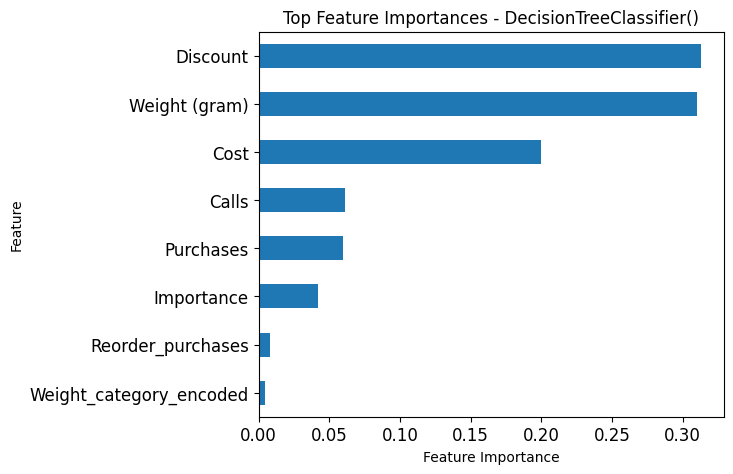

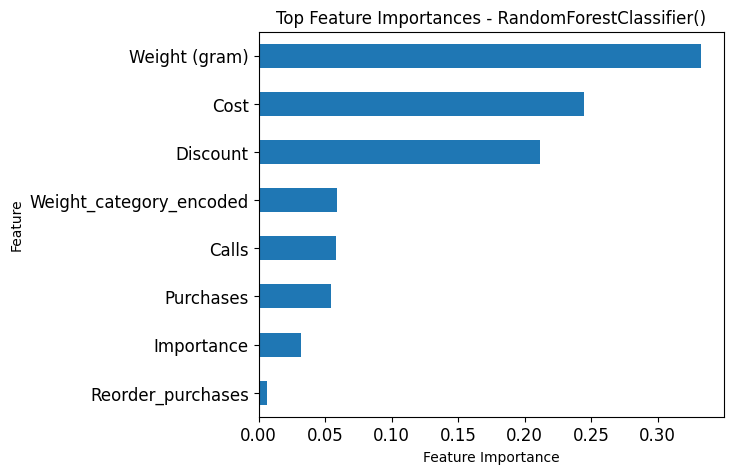

In [65]:
plot_feature_importances(dt)
plot_feature_importances(rf)

Fitur yang dapat dilihat dari model ini adalah 3 fitur utama yaitu `weight`, `discount`, dan `cost`

- `weight` menjadi penyumbang yang dominan dari keterlambatan suatu produk, sehingga pihak penyedia jasa memerlukan program khusus untuk mengkategorikan suatu produk dengan `weight` tertentu dan memasukannya ke dalam teknik pengiriman tertentu, sehingga barang yang memiliki `weight` berbeda bisa sampai tepat waktu.
- `cost` memiliki kontribusi yang cukup besar juga, disarankan membuat sebuah armada pengiriman yang menggolongkan barang berdasarkan kategori `cost` juga agar barang yang mempunyai `cost` tinggi maupun rendah mampu sampai tepat waktu.